In [13]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
# @Date    : Jun-01-21 15:11
# @Author  : Kan HUANG (kan.huang@connect.ust.hk)
# @RefLink : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# @RefLink : https://discuss.pytorch.org/t/how-to-split-dataset-into-test-and-validation-sets/33987/5

import numpy as np
import torch
from torchvision.datasets import ImageFolder
from torchvision.transforms import Compose, ToTensor, Resize
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## train_test_split

- numpy arrays

In [3]:
X, y = np.arange(10).reshape((5, 2)), range(5)
print(X) # Column first
print(y)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
range(0, 5)


### 用于生成数据索引

In [5]:
num_samples = 50000 # Same as MNIST
val_split = 0.2
# train_test_split
# Input: a list of int
# Outputs: train indices, validation indices
train_idx, val_idx = train_test_split(list(range(num_samples)), test_size=val_split, shuffle=False)


#### 结合 PyTorch Datasets 使用

In [2]:
def train_val_dataset(dataset, val_split=0.25):
    train_idx, val_idx = train_test_split(list(range(len(dataset))), test_size=val_split)
    datasets = {}
    datasets['train'] = Subset(dataset, train_idx)
    datasets['val'] = Subset(dataset, val_idx)
    return datasets

In [12]:
len_dataset = 1000
val_split = 0.25
# 随机的，因此固定random_state
random_state = 42
train_idx, val_idx = train_test_split(
    list(range(len_dataset)), test_size=val_split, random_state=random_state)
print(train_idx[:10])  # 只要random_state一致结果就一直



[82, 991, 789, 894, 398, 323, 519, 916, 922, 5]


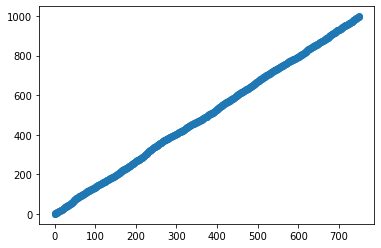

In [17]:
#### 可视化索引序列
plt.scatter(list(range(len(train_idx))), sorted(train_idx))
# - 稀疏性
# - 随机性

In [19]:
from torchvision import datasets, transforms
kwargs = {'batch_size': 32}

# prepare transform
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    transforms.Lambda(lambda x: torch.flatten(x)
                        )  # Add for 1D inputs
])

data_root = os.path.expanduser("~/.datasets")
mnist_train = datasets.MNIST(
    data_root, train=True, download=True, transform=transform)
mnist_test = datasets.MNIST(
    data_root, train=False, transform=transform)
train_loader = torch.utils.data.DataLoader(mnist_train, **kwargs)
test_loader = torch.utils.data.DataLoader(mnist_test, **kwargs)

In [25]:
# mnist_train.__dir__()
mnist_train.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [30]:
from torch.utils.data import Subset
from sklearn.model_selection import train_test_split
def train_val_dataset(dataset, val_split=0.25, random_state=None):
    train_idx, val_idx = train_test_split(list(range(len(dataset))), test_size=val_split, random_state=random_state)
    datasets = {}
    datasets['train'] = Subset(dataset, train_idx)
    datasets['val'] = Subset(dataset, val_idx)
    return datasets

In [32]:
mnist_train_val = train_val_dataset(mnist_train, random_state=42)
train_loader = torch.utils.data.DataLoader(mnist_train_val["train"], **kwargs)
valid_loader = torch.utils.data.DataLoader(mnist_train_val["val"], **kwargs)